In [1]:
"""
Created on Thu Sep 22 13:06:00 2022

# Explorative Data Analysis Workshop 1  (Statistics for DS)


The instructions in this file assume that you are using Spyder by Anaconda. 
They might be different if you are using Jupyler. For example: Jupyler prints
all columns when you use the command df.head(). Spyder just prints some columns, 
it is desirable to use the Variable Explorer instead. 


# Objective:
    1.- Execute a simple EDA.
    2.- Clean DATA
    3.- Plot Distributions and Box Plots
    4.- Proof that there is a relationship between area and house cost.
    5.- Plot a Categorial Data
    6.- Plot a Correlation Matrix
 
    
@author: Alejandro Murrieta-Mendoza
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
from scipy import stats


In [2]:
# DATASET PRELIMINAR ANALYSIS
# 1: Load the file "Amsterdam2021.csv" and assign it to df.

df = pd.read_csv("./amsterdam.csv")


In [3]:
# 2: Make a Copy of this dataset to df_original.
# HINT: DataFrame.copy()

df_original = df.copy()

In [4]:
# 3: Explore your dataset. Use the function DataFrame.head() and assign it to data_head.

data_head = df.head()
print(data_head)

# 3A Open this new variable in the data_head and aswer the next questions

# How many Variables do you have in this dataset?

print(data_head.keys())

# How many datapoints do you have in this data set?
# Use df.shape to verify your answers

print(data_head.shape[0])

# How many continous variables do yo have?
# How many discrete varialbes do you have?
# How many categorial variables do you have in that dataset?
# Discuss your answers with your team member.

print("Discrete: Room, Area")
print("Continous: Price, Lon, Lat")
print("Categorial: Address, Zip")


# Use DataFrame.dtypes.astype(str).value_counts() to give you an idea of your answers
# Do you all agree? Ask another team :)
# Cannot agree? look for me and we can discuss this.

print(df.dtypes.astype(str).value_counts())

   Unnamed: 0                                 Address      Zip     Price  \
0           1            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0   
1           2  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0   
2           3              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   
3           4            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   
4           5              Winterjanpad 21, Amsterdam  1036 KN  720000.0   

   Area  Room       Lon        Lat  
0    64     3  4.907736  52.356157  
1    60     3  4.850476  52.348586  
2   109     4  4.944774  52.343782  
3   128     6  4.789928  52.343712  
4   138     5  4.902503  52.410538  
Index(['Unnamed: 0', 'Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')
5
Discrete: Room, Area
Continous: Price, Lon, Lat
Categorial: Address, Zip
int64      3
float64    3
object     2
Name: count, dtype: int64


In [5]:
# 4: Print your column names

print(data_head.keys())

Index(['Unnamed: 0', 'Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')


In [6]:
# 5: Rename "Unnamed: 0" as "Index"

df = df.rename(columns={"Unnamed: 0": "Index"})
print(df.head())

   Index                                 Address      Zip     Price  Area  \
0      1            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0    64   
1      2  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0    60   
2      3              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   109   
3      4            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   128   
4      5              Winterjanpad 21, Amsterdam  1036 KN  720000.0   138   

   Room       Lon        Lat  
0     3  4.907736  52.356157  
1     3  4.850476  52.348586  
2     4  4.944774  52.343782  
3     6  4.789928  52.343712  
4     5  4.902503  52.410538  


In [7]:
### EDA ###
# EDA: Varibles exporation
# 6.- Save a description of your numerical variables as variable df_description_numerical.
# HINT: describe()

df_descriptional_numerical = df.describe()


# 6A.- Observe and analyse the variable df_description_numerical.

print(df_descriptional_numerical)


# Why is there a difference in the count of datapoints for the variable price?

# Does the information in the variable "index" is useful for the analysis?
# If so, why?. If it is not there why should we or should we not delete it?
# Can we avoid havig that column at all? If you look at the original csv file,
# that variable does not exist.

            Index         Price        Area        Room         Lon  \
count  924.000000  9.200000e+02  924.000000  924.000000  924.000000   
mean   462.500000  6.220654e+05   95.952381    3.571429    4.888605   
std    266.880123  5.389942e+05   57.447436    1.592332    0.053140   
min      1.000000  1.750000e+05   21.000000    1.000000    4.644819   
25%    231.750000  3.500000e+05   60.750000    3.000000    4.855834   
50%    462.500000  4.670000e+05   83.000000    3.000000    4.886818   
75%    693.250000  7.000000e+05  113.000000    4.000000    4.922337   
max    924.000000  5.950000e+06  623.000000   14.000000    5.029122   

              Lat  
count  924.000000  
mean    52.363326  
std      0.024028  
min     52.291519  
25%     52.352077  
50%     52.364631  
75%     52.377598  
max     52.423805  


In [8]:
# 7.- Save a description of your categorial  variables as variable df_description_categorical.
# HINT: (inclde = object)

df_descriptional_categorical = df.select_dtypes(include="object")
print(df_descriptional_categorical)


# Why are there frequencies of the variable "Address" larger than one? Is this logical?
# Find a frequency of two in your data set and think about it. Example: "Ringdijk, Amsterdam"

print(df_descriptional_categorical["Address"].value_counts())

                                    Address      Zip
0              Blasiusstraat 8 2, Amsterdam  1091 CR
1    Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL
2                Zaaiersweg 11 A, Amsterdam  1097 SM
3              Tenerifestraat 40, Amsterdam  1060 TH
4                Winterjanpad 21, Amsterdam  1036 KN
..                                      ...      ...
919                     Ringdijk, Amsterdam  1097 AE
920         Kleine Beerstraat 31, Amsterdam  1033 CP
921       Stuyvesantstraat 33 II, Amsterdam  1058 AK
922   John Blankensteinstraat 51, Amsterdam  1095 MB
923      S. F. van Ossstraat 334, Amsterdam  1068 JS

[924 rows x 2 columns]
Address
Quashibastraat, Amsterdam             2
Ringdijk, Amsterdam                   2
Uilengouw 2, Amsterdam                2
Huidekoperstraat 24 F, Amsterdam      2
Nieuwevaartweg, Amsterdam             2
                                     ..
Rapenburgerplein 8 B, Amsterdam       1
Willem Mollhof 3, Amsterdam           1
De Bleeckste

In [9]:
# EDA: Missing values
# 8.- Determine how many missing values are in the dataframe
# HINT .isnull() and/or .sum() might help you

missing_values = df[df["Price"].isnull()]

# 8A.- Compute the percentage of missing values from the dataset and save it in missing_values_per

missing_values_per = missing_values.shape[0] / df.shape[0]
print(f"{round(missing_values_per * 100, 2)}%")

# 8B.- Identify and analyse the missing values.
# HINT: isnull() and/or .any(axis =1)
#      What would be the best way to handle these missing values?


# Wait. think about it before going further down


# Are you sure you gave it enough thought?


# ANTWOORD(yes... a dutch word, Respuesta or Solución sound better, but oh well):
# Remove them for now, they are too different.

0.43%


In [10]:
# 9.- Remove the values from the data set.
#     HINT: .index and axis = 0 might help.

df = df.drop(index=missing_values.index, axis=0)

In [11]:
# 10.- Verify that you indeed delete the N/A values and review the new data point count.
#  HINT: .shape and .isnull().sum()

print(df.shape)
print(df[df["Price"].isnull()])

(920, 8)
Empty DataFrame
Columns: [Index, Address, Zip, Price, Area, Room, Lon, Lat]
Index: []


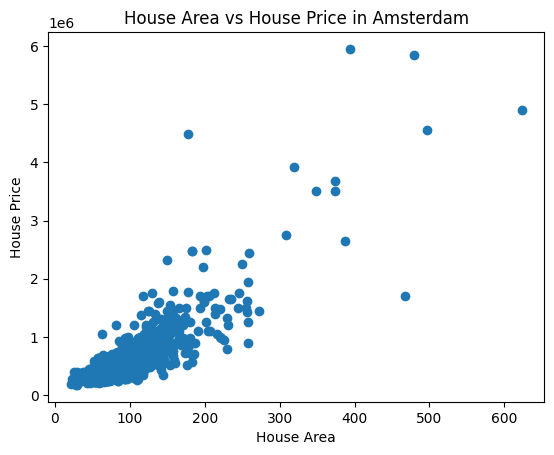

In [12]:
# 11.- Show a scatter plot for House Price and Area. Name your labels and add
# a title to your plot.

plt.scatter(x=df["Area"], y=df["Price"])
plt.xlabel("House Area")
plt.ylabel("House Price")
plt.title("House Area vs House Price in Amsterdam")
plt.show()

# Which value is in your Y axis? Why?
# Does it look like a linear relationship to you?
# In simple words, how would you interpretate this plot?

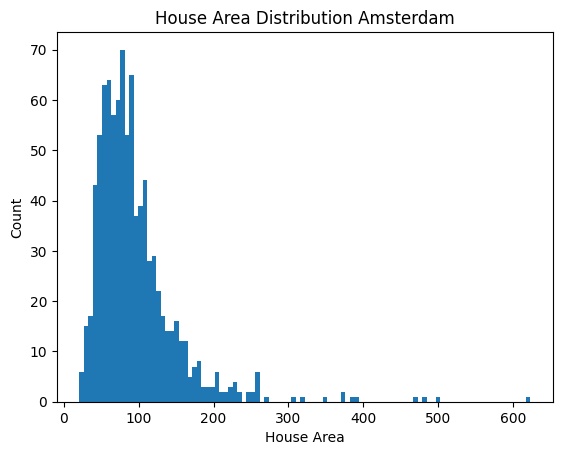

In [13]:
# 12.- Plot an Histogram for the variable Area. bins= 100. Name your axis
#      Feel free to play with bins size. What does it do?
#      I expect you to google how to do this... yes i know... just google it...

plt.hist(df["Area"], bins=100)
plt.title("House Area Distribution Amsterdam")
plt.xlabel("House Area")
plt.ylabel("Count")
plt.show()

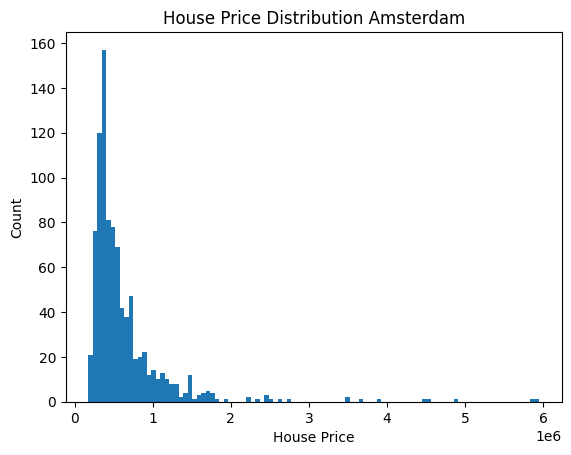

In [14]:
# 13.- Plot an Histogram for the variable Price. bins= 100. Name your axis

plt.hist(df["Price"], bins=100)
plt.title("House Price Distribution Amsterdam")
plt.xlabel("House Price")
plt.ylabel("Count")
plt.show()

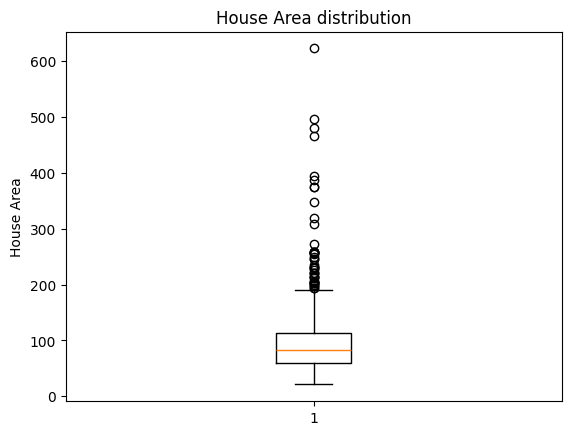

In [15]:
# What can you conclude from this distribution. Are there outliers?
# There are different rules to define outliers. We will cover this in a different
# workshop

# 14.- Draw a Boxplot for House Area. Name your axisa and add a title name
#      Some concepts define an outlier as any point farther from 1.5 IQR.
#      Under this concept, would you think that there are outliers?

plt.boxplot(df["Area"])
plt.ylabel("House Area")
plt.title("House Area distribution")
plt.show()

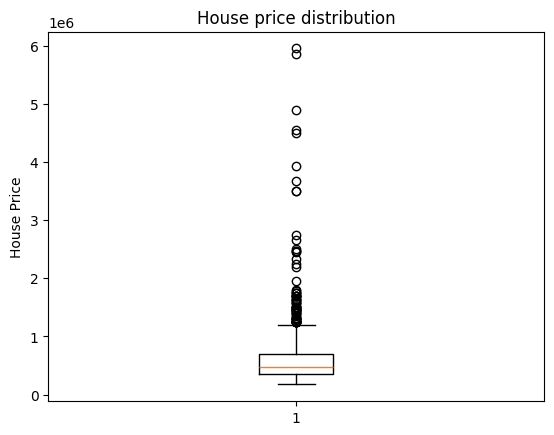

In [16]:
# 15.- Draw a Boxplot for House Price. Name your axis and add a title name
# What is the median for price?

plt.boxplot(df["Price"])
plt.ylabel("House Price")
plt.title("House price distribution")
plt.show()


In [17]:
# 16.- Remove the last letters from your ZIP code including the blank space
#      We are coding the ZIP code (witout the letters) to be used as regression
#      I know... i never told you explicitly how to to this. But you can do it!

# 17.- Change the column ['ZIP] to int
# Hint: .astype(int)

df['Zip'] = df['Zip'].str[0:4].astype(int)
df.head()

,Index,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036,720000.0,138,5,4.902503,52.410538


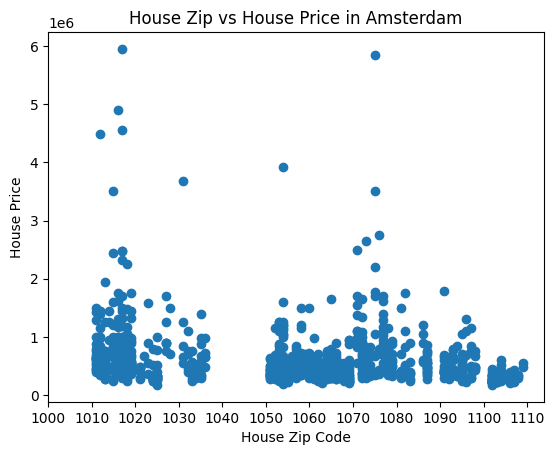

In [18]:
# 18.- Plot the scatter plot Zip Code Vs Price

plt.scatter(x=df['Zip'], y=df['Price'])
plt.xlabel("House Zip Code")
plt.ylabel("House Price")
plt.title("House Zip vs House Price in Amsterdam")
plt.xticks(np.arange(1000, 1120, 10))
plt.show()

# Did you expect this result?
# I did not... Why are not houses in Zuid WAAAAY more expensive? Or houses in
# the center... (i know, who wants to live in the center?... Tourists and AirBNB
# or those expats, expats learn to move out eventually though :)  )

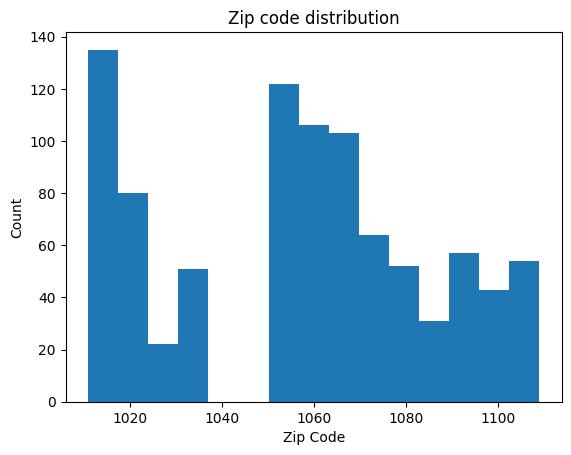

In [19]:
# 19.- Plot the distribution of Zip Code
plt.hist(df['Zip'], bins=15)
plt.xlabel("Zip Code")
plt.ylabel("Count")
plt.title("Zip code distribution")
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69],
 [Text(0, 0, '1011'),
  Text(1, 0, '1012'),
  Text(2, 0, '1013'),
  Text(3, 0, '1014'),
  Text(4, 0, '1015'),
  Text(5, 0, '1016'),
  Text(6, 0, '1017'),
  Text(7, 0, '1018'),
  Text(8, 0, '1019'),
  Text(9, 0, '1021'),
  Text(10, 0, '1022'),
  Text(11, 0, '1023'),
  Text(12, 0, '1024'),
  Text(13, 0, '1025'),
  Text(14, 0, '1027'),
  Text(15, 0, '1028'),
  Text(16, 0, '1031'),
  Text(17, 0, '1032'),
  Text(18, 0, '1033'),
  Text(19, 0, '1034'),
  Text(20, 0, '1035'),
  Text(21, 0, '1036'),
  Text(22, 0, '1051'),
  Text(23, 0, '1052'),
  Text(24, 0, '1053'),
  Text(25, 0, '1054'),
 

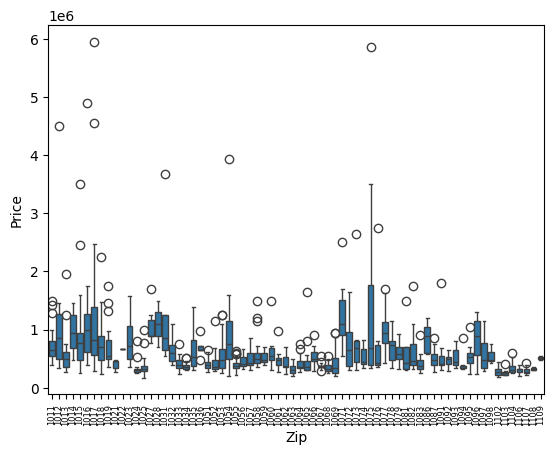

In [20]:
# 20.- Plot the distribution of every Zip Code vs Price
# HINT: USE sns.boxplot(x = ____, y = ____)
# Suggestion: _ = plt.xticks(fontsize = 6, rotation=90)
# Would you think there are outliers there?

sns.boxplot(x=df['Zip'], y=df['Price'])
plt.xticks(fontsize = 6, rotation=90)

In [23]:
# 21 - Google the method DataFrame.corr() and implement it

data_corr = df.select_dtypes(include=["int64", "float64"]).corr(method='pearson')

data_corr

# What are th>e two values that postitevly correlate more with Price?
# What is the infleunce of the house location (ZIP code) in Price?

,Index,Zip,Price,Area,Room,Lon,Lat
Index,1.000000,0.070963,-0.116311,-0.069611,-0.026487,-0.030239,0.003137
Zip,0.070963,1.000000,-0.219669,-0.119736,-0.036774,0.141371,-0.715895
Price,-0.116311,-0.219669,1.000000,0.835090,0.623448,-0.013561,0.062196
Area,-0.069611,-0.119736,0.835090,1.000000,0.808285,0.021762,0.014179
Room,-0.026487,-0.036774,0.623448,0.808285,1.000000,-0.025753,-0.021168
Lon,-0.030239,0.141371,-0.013561,0.021762,-0.025753,1.000000,-0.183445
Lat,0.003137,-0.715895,0.062196,0.014179,-0.021168,-0.183445,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

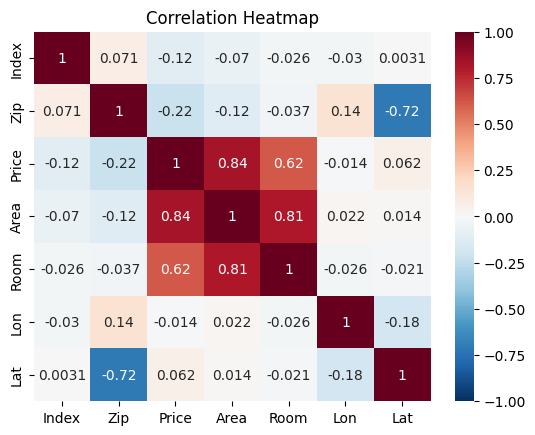

In [22]:
# 22.- Plot a heat correlation map
# HINT: sns.heatmap
# HINT2 : You need corrmat

heatmap = sns.heatmap(data_corr, vmin=-1, vmax=1, annot=True, cmap="RdBu_r")
heatmap.set_title("Correlation Heatmap")

# Can you undestand this heat map?
# Explain this map to your team memembers.
# Tell them wich variables/features you think are more important and why.
# No one knows? Ask that friend from the other team
# Still lost?
# Come see me

#### END OF WORKSHOP 1 ####
